## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import datasets, metrics
# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
wine = datasets.load_wine()
boston = datasets.load_boston()

In [3]:
X_train , X_test , y_train , y_test = train_test_split(wine.data,wine.target,test_size = 0.25 , random_state = 0)

In [4]:
clf = DecisionTreeClassifier(criterion = 'gini'
                            ,max_depth = 4
                            ,max_features = 5
                            )
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Acuuracy:{metrics.accuracy_score(y_test, y_pred)}\nr2_score:{metrics.r2_score(y_test, y_pred)}')

Acuuracy:0.9555555555555556
r2_score:0.9114173228346457


In [5]:
feature_names = ['酒精','蘋果酸','灰','灰的鹼性','鎂','總酚','類黃酮','非黃酮類酚','花青素','顏色強度','色調','稀釋葡萄酒','脯氨酸']
class_names = ['琴酒','雪莉','貝爾摩格']
print("Feature importance:")
pd.Series(clf.feature_importances_ , feature_names)

Feature importance:


酒精       0.000000
蘋果酸      0.000000
灰        0.000000
灰的鹼性     0.000000
鎂        0.000000
總酚       0.000000
類黃酮      0.458012
非黃酮類酚    0.000000
花青素      0.000000
顏色強度     0.387221
色調       0.126138
稀釋葡萄酒    0.000000
脯氨酸      0.028629
dtype: float64

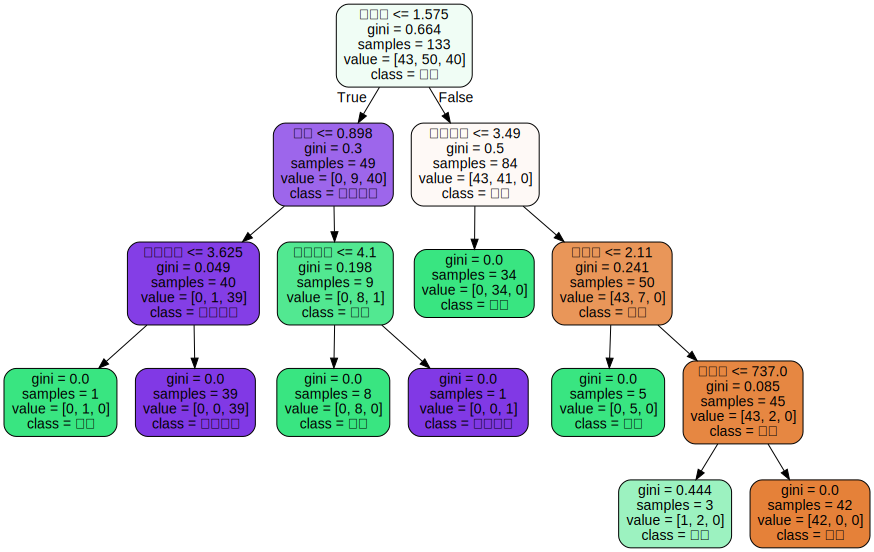

In [7]:
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_names 
                                ,class_names = class_names
                                ,filled = True  # 顏色區分class 深淺區分 '不純度'
                                ,rounded = True 
                               )
graph = graphviz.Source(dot_data)
graph